# Part 2.2 - Exploratory Data Analysis
---


The objectives of this notebook is to remove outliers for the target price, conduct manual selection of useful nominal features via visualization and engineer additional features that aggregate existing features.


From Part 2.1, we know that `Gr Liv Area` is strongly correlated to `SalePrice` (`Overall Qual` is not used as it is not as informative, it is more intuitive to visualise the sale-price and size of the property). Therefore, we will use a plot of `SalePrice` against `Gr Liv Area` to identify outliers and additional useful features.

## Houskeeping


Importing the libraries and DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# remove warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 150

df = pd.read_csv("df_clean_ordinal_encoded.csv")
display(df.head())

columns_dropped = ["Lot Frontage"] # from Part 1

nominal = ["MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Utilities", "Lot Config", "Neighborhood", "Condition 1", "Condition 2", 
    "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", 
    "Foundation", "Heating", "Electrical", "Garage Type", "Misc Feature", "Sale Type"]

Id        PID  MS SubClass MS Zoning  Lot Area Street Alley  Lot Shape  \
0  109  533352170           60        RL  9.511777   Pave  none   1.098612   
1  544  531379050           60        RL  9.349493   Pave  none   1.098612   
2  153  535304180           20        RL  8.977525   Pave  none   1.386294   
3  318  916386060           60        RL  9.190444   Pave  none   1.386294   
4  255  906425045           50        RL  9.563529   Pave  none   1.098612   

  Land Contour Utilities Lot Config  Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac         0.0       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac         0.0      SawyerW        Norm   
2          Lvl    AllPub     Inside         0.0        NAmes        Norm   
3          Lvl    AllPub     Inside         0.0       Timber        Norm   
4          Lvl    AllPub     Inside         0.0      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6      2.197225        1976   
1        Norm      1Fam      2Story             7      1.791759        1996   
2        Norm      1Fam      1Story             5      2.079442        1953   
3        Norm      1Fam      2Story             5      1.791759        2006   
4        Norm      1Fam      1.5Fin             6      2.197225        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area  Exter Qual  Exter Cond Foundation  Bsmt Qual  Bsmt Cond  \
0      5.669881    1.098612    0.693147     CBlock   1.386294   1.386294   
1      4.890349    1.098612    0.693147      PConc   1.609438   1.386294   
2      0.000000    0.693147    1.098612     CBlock   1.386294   1.386294   
3      0.000000    0.693147    0.693147      PConc   1.609438   1.386294   
4      0.000000    0.693147    0.693147      PConc   1.098612   1.609438   

   Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  \
0       0.693147               6      6.280396        0.693147           0.0   
1       0.693147               6      6.458338        0.693147           0.0   
2       0.693147               6      6.595781        0.693147           0.0   
3       0.693147               1      0.000000        0.693147           0.0   
4       0.693147               1      0.000000        0.693147           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating  Heating QC  Central Air Electrical  \
0     5.262690       6.587550    GasA           3     0.693147      SBrkr   
1     5.624018       6.817831    GasA           3     0.693147      SBrkr   
2     5.789960       6.964136    GasA           1     0.693147      SBrkr   
3     5.953243       5.953243    GasA           2     0.693147      SBrkr   
4     6.517671       6.517671    GasA           1     0.693147      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0    6.587550    6.626718              0.0     7.299797        0.000000   
1    6.817831    7.098376              0.0     7.660585        0.693147   
2    6.964136    0.000000              0.0     6.964136        0.693147   
3    6.613384    6.552508              0.0     7.275865        0.000000   
4    6.723832    6.421622              0.0     7.276556        0.000000   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          2   0.693147              3       0.693147   
1             0.0          2   0.693147              4       0.693147   
2             0.0          1   0.000000      

### Re-usable Plotting Function

In [2]:
def plot_scatter(hue):
    plt.figure(figsize=(12,8))
    sns.scatterplot("Gr Liv Area", "SalePrice", data=df, hue=hue)

## Outliers


From the scatteplot we observe that there are 2 datapoints which have low prices given the abnormally large `Gr Liv Area`. We will treat the 2 data points as outliers and drop their rows from the dataset.

Id        PID  MS SubClass MS Zoning   Lot Area Street Alley  \
960   1499  908154235           60        RL  11.064887   Pave  none   
1885  2181  908154195           20        RL  10.578751   Pave  none   

      Lot Shape Land Contour Utilities Lot Config  Land Slope Neighborhood  \
960    0.000000          Bnk    AllPub     Corner         0.0      Edwards   
1885   1.098612          Bnk    AllPub     Inside         0.0      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
960        Feedr        Norm      1Fam      2Story            10   
1885        Norm        Norm      1Fam      1Story            10   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
960       1.791759        2008            2008        Hip   ClyTile   
1885      1.791759        2008            2009        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  \
960        Stucco       Stucco        Stone      6.680855    1.386294   
1885      CemntBd      CmentBd        Stone      7.110696    1.386294   

      Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
960     0.693147      PConc   1.791759   1.386294       1.609438   
1885    0.693147      PConc   1.791759   1.386294       1.609438   

      BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
960                6      8.638525        0.693147           0.0     6.146329   
1885               6      8.296796        0.693147           0.0     6.990257   

      Total Bsmt SF Heating  Heating QC  Central Air Electrical  1st Flr SF  \
960        8.717846    GasA           3     0.693147      SBrkr    8.453827   
1885       8.536211    GasA           3     0.693147      SBrkr    8.536211   

      2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
960     6.857514              0.0     8.638171        1.098612   
1885    0.000000              0.0     8.536211        0.693147   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
960         0.000000          2   0.693147              3       0.693147   
1885        0.693147          2   0.693147              2       0.693147   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  \
960       1.386294       2.564949    2.079442    1.386294             4   
1885      1.386294       2.772589    2.079442    1.098612             4   

     Garage Type  Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  \
960       Attchd       7.605392              3          2.0       1418.0   
1885      Attchd       7.605392              3          3.0       1154.0   

      Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  Open Porch SF  \
960      1.386294     1.386294     1.098612      5.370638       5.680173   
1885     1.386294     1.386294     1.098612      6.304449       6.184149   

      Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area   Pool QC  Fence  \
960              0.0         0.0           0.0   6.175867  1.386294    0.0   
1885             0.0         0.0           0.0   0.000000  0.000000    0.0   

     Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
960          none  0.000000        1     2008       New  11.982935  
1885         Elev  9.741027       10     2007       New  12.121881

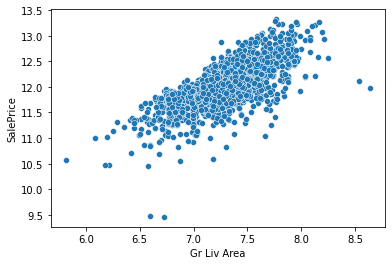

In [3]:
sns.scatterplot("Gr Liv Area", "SalePrice", data=df)
df[df["Gr Liv Area"]>8.3]

In [4]:
df.drop(index=[960,1885], axis=0,inplace=True)

## Impact of Property Amenities on SalePrice


In Ames, houses may have the following amenities on their property
- Basements
- Garages
- Fireplaces
- Pools
- Fences
- Alleys
- 2nd floor
- Porches
- Wood Decks


We will examine the relationship between `SalePrice` and the presence of the above amenities. If there is a relationship, this means that the related features will be useful for our regression analysis.


We will need to create new binary encoded columns to capture whether the property has the particular amenity.

In [5]:
# Need to aggregate porch related features as there isnt a Yes/No for the presence of a porch
df["total_porch"] = df["Open Porch SF"] + df["Enclosed Porch"] + df["3Ssn Porch"] + df["Screen Porch"]

In [6]:
df["has_bsmt"] = df["Bsmt Qual"].apply(lambda x:1 if x > 0 else 0)
df["has_garage"] = df["Garage Qual"].apply(lambda x:1 if x > 0 else 0)
df["has_fireplace"] = df["Fireplace Qu"].apply(lambda x:1 if x > 0 else 0)
df["has_pool"] = df["Pool QC"].apply(lambda x:1 if x > 0 else 0)
df["has_alley"] = df["Alley"].apply(lambda x:1 if x != "none" else 0)
df["has_fence"] = df["Fence"].apply(lambda x:1 if x > 0 else 0)
df["has_2f"] = df["2nd Flr SF"].apply(lambda x:1 if x > 0 else 0)
df["has_porch"] = df["total_porch"].apply(lambda x:1 if x > 0 else 0)
df["has_wood_deck"] = df["Wood Deck SF"].apply(lambda x:1 if x > 0 else 0)

new_features=[] # to keep track of new features we created

### Basement


All properties with a basement tend to be of a highe value. `has_bsmt` is likely a good predictor.


We will retain this feature.

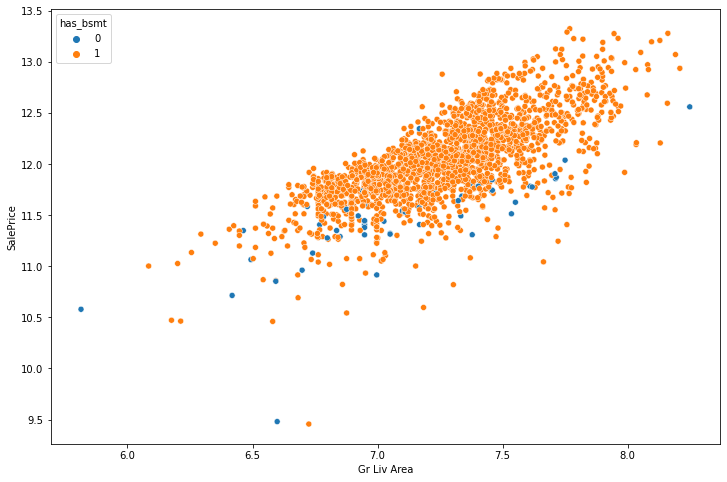

In [7]:
plot_scatter("has_bsmt")

### Garage


All properties with a garage are higher in value. `has_garage` is good predictor.


We will retain this feature.

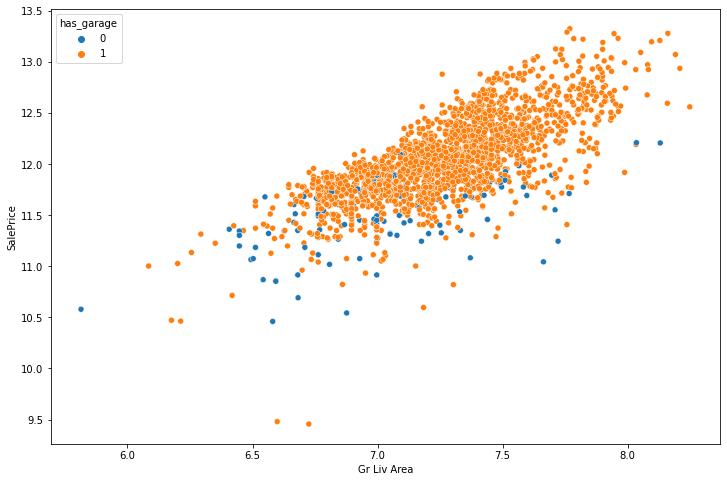

In [8]:
plot_scatter("has_garage")

In [9]:
new_features.append("has_garage")

### Fireplace


Fireplaces tend to be present in larger properties, and are more valuable for each fixed living area.


We will retain this feature.

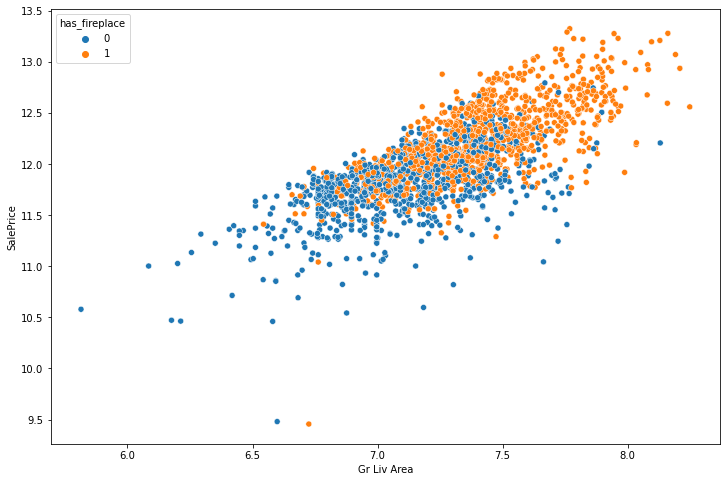

In [10]:
plot_scatter("has_fireplace")

In [11]:
new_features.append("has_fireplace")

### Pools


Almost all properties do not have a pool. `has_pool` is likely not a good predictor.


We will remove this feature and the related features `Pool Area` and `Pool QC`

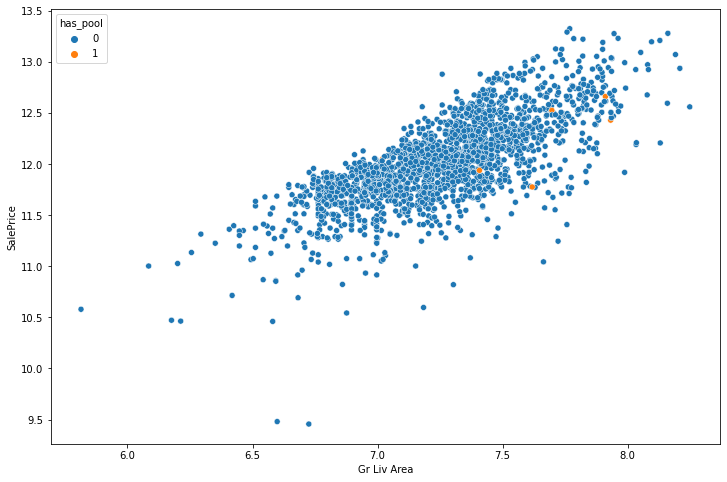

In [12]:
plot_scatter("has_pool")

In [13]:
del df["has_pool"]
del df["Pool QC"]
del df["Pool Area"]

### Fence


Almost all properties do not have a fence. `has_fence` is likely not a good predictor.


We will remove this feature.

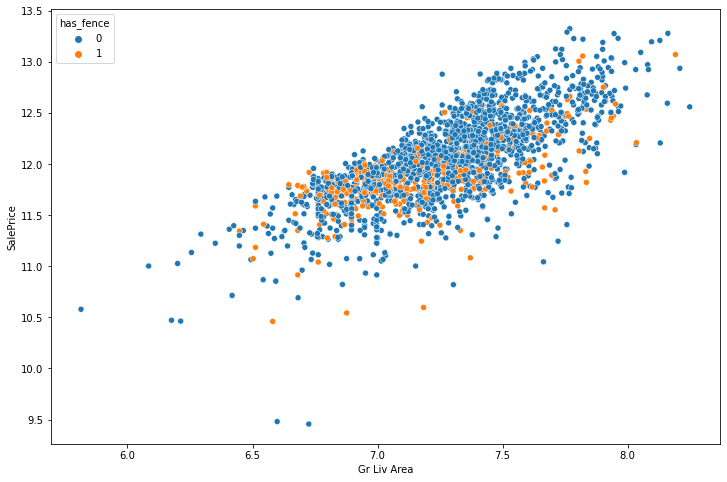

In [14]:
plot_scatter("has_fence")

In [15]:
del df["has_fence"]

### Alleys


Almost all properties do not have an alley. `has_alley` is likely not a good predictor.


We will remove this feature.

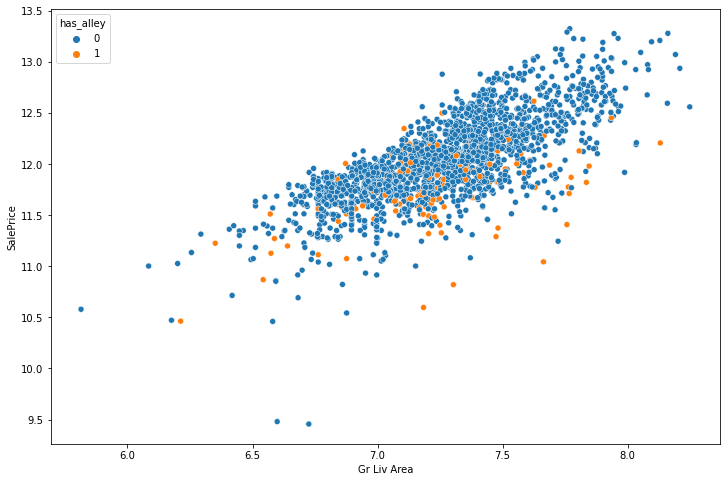

In [16]:
plot_scatter("has_alley")

In [17]:
del df["has_alley"]

### 2nd Floors


Properties with 2nd floors tend to be bigger. But for every fixed living area, properties with 1 floor seem to be of higher value.


We will retain this feature.

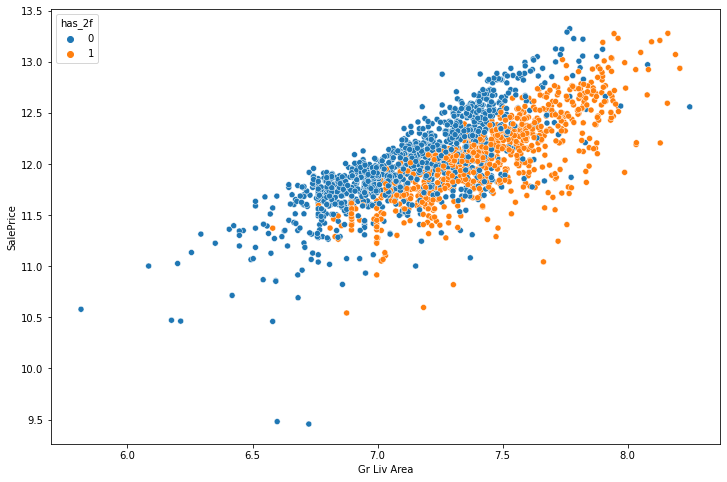

In [18]:
plot_scatter("has_2f")

In [19]:
new_features.append("has_2f")

### Porches


No apparent relationship between property value and presence of a porch. `has_porch` is likely not a good predictor.


We will remove this feature.

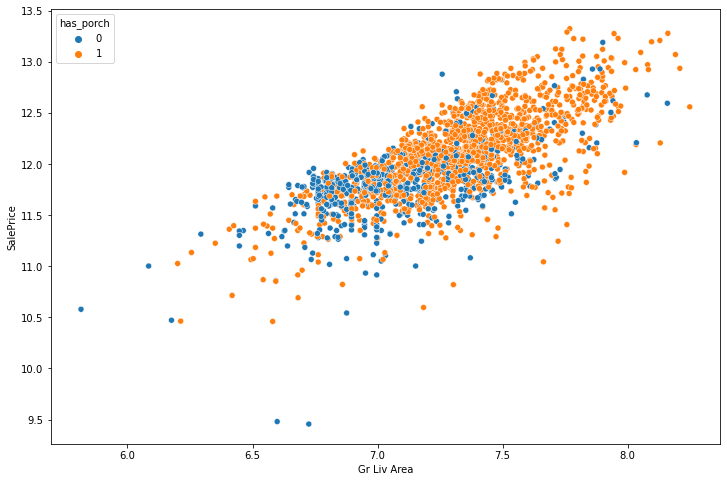

In [20]:
plot_scatter("has_porch")

In [21]:
del df["has_porch"]

### Wood Deck


No apparent relationship between property value and presence of a porch. `has_porch` is likely not a good predictor.


We will remove this feature.

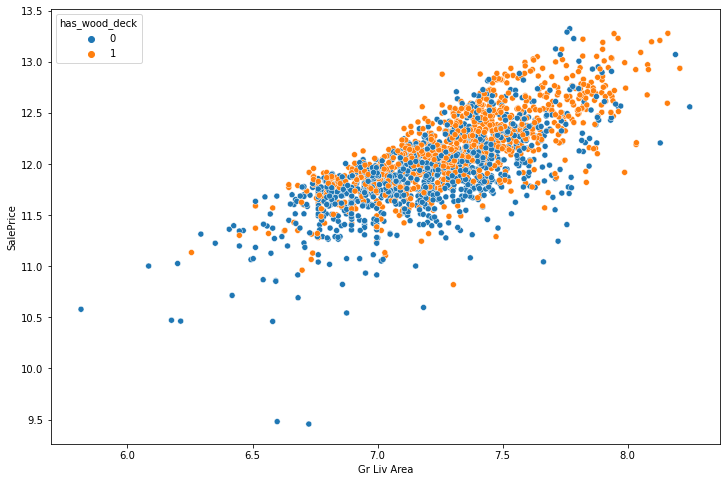

In [22]:
plot_scatter("has_wood_deck")

In [23]:
del df["has_wood_deck"]

## Property Remodelling


Close to half of the properties were remodelled at some point. We would expect the newer and refreshed properties to command a higher value.


We will define `recently_built` properties as properties that are sold within 10 years of it being built, and defined `recently_remoded` properties as properties that are sold within 10 years of it being remodelled.

In [24]:
df["remoded"] = df["Year Remod/Add"] - df["Year Built"]
df["remoded"] = df["remoded"].apply(lambda x: 1 if x>0 else 0)
display(df["remoded"].value_counts(normalize=True))

0    0.537335
1    0.462665
Name: remoded, dtype: float64

In [25]:
df["recently_built"] = df["Yr Sold"] - df["Year Built"]
df["recently_remoded"] = df["Yr Sold"] - df["Year Remod/Add"]

df["recently_built"] = df["recently_built"].apply(lambda x: 1 if x <= 10 else 0)
df["recently_remoded"] = df["recently_remoded"].apply(lambda x: 1 if x <= 10 else 0)

Generally, properties that were sold within 10 years of it being built or remodelled tend to be more valuable than properties that were not, given the same living area.


We will include this feature and remove the other Year-related features

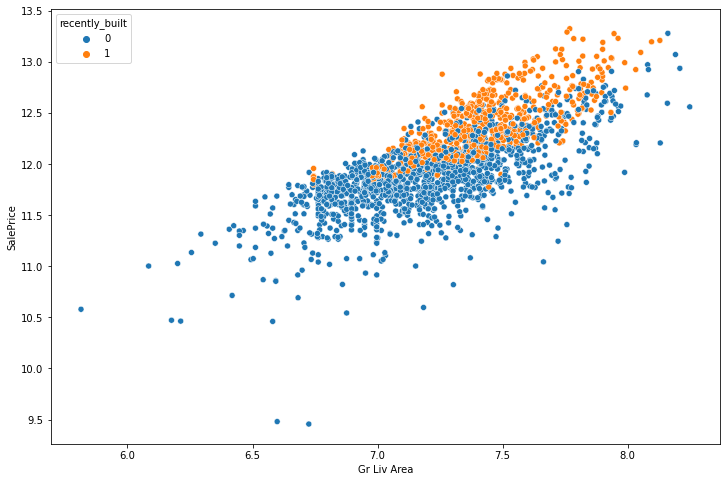

In [26]:
plot_scatter("recently_built")

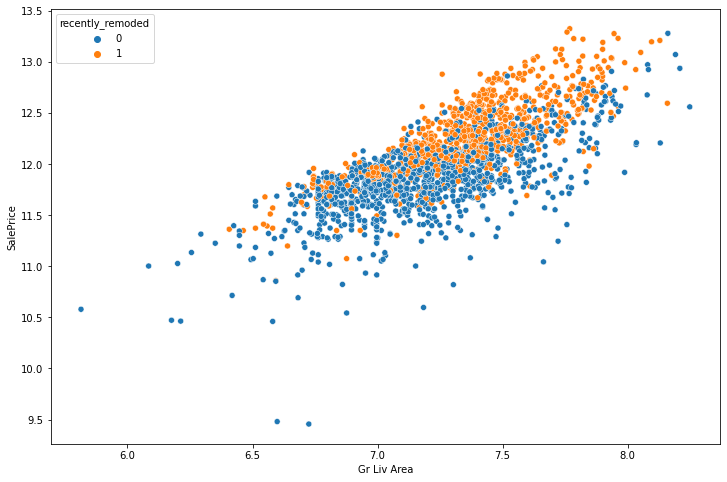

In [27]:
plot_scatter("recently_remoded")

In [28]:
del df["remoded"]
del df["Yr Sold"]
del df["Mo Sold"]
del df["Year Built"]
del df["Year Remod/Add"]

columns_dropped.append("Yr Sold") # keep track of the original columns we dropped
columns_dropped.append("Mo Sold")
columns_dropped.append("Year Remod/Add")
columns_dropped.append("Year Built")

new_features.append("recently_built") # keep track of new features we included
new_features.append("recently_remoded")

## Nominal Features


In Part II we addressed the ordinal, numerical and discrete features using pair-wise correlation. However that approach cannot be done easily for nominal features.

In [29]:
display(df[nominal])

MS SubClass MS Zoning Street Alley Land Contour Utilities Lot Config  \
0              60        RL   Pave  none          Lvl    AllPub    CulDSac   
1              60        RL   Pave  none          Lvl    AllPub    CulDSac   
2              20        RL   Pave  none          Lvl    AllPub     Inside   
3              60        RL   Pave  none          Lvl    AllPub     Inside   
4              50        RL   Pave  none          Lvl    AllPub     Inside   
...           ...       ...    ...   ...          ...       ...        ...   
2046           20        RL   Pave  none          HLS    AllPub     Inside   
2047           30        RL   Pave  none          Lvl    AllPub     Inside   
2048           50        RL   Pave  none          Bnk    AllPub     Inside   
2049           20        RL   Pave  none          Lvl    AllPub     Corner   
2050           60        RL   Pave  none          Lvl    AllPub     Inside   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0          Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1         SawyerW        Norm        Norm      1Fam      2Story      Gable   
2           NAmes        Norm        Norm      1Fam      1Story      Gable   
3          Timber        Norm        Norm      1Fam      2Story      Gable   
4         SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   
...           ...         ...         ...       ...         ...        ...   
2046       Timber        Norm        Norm      1Fam      1Story      Gable   
2047      Edwards        Norm        Norm      1Fam      1Story      Gable   
2048      Crawfor        Norm        Norm      1Fam      1.5Fin      Gable   
2049        NAmes        Norm        Norm      1Fam      1Story      Gable   
2050      Gilbert        Norm        Norm      1Fam      2Story      Gable   

     Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating  \
0      CompShg      HdBoard      Plywood      BrkFace     CBlock    GasA   
1      CompShg      VinylSd      VinylSd      BrkFace      PConc    GasA   
2      CompShg      VinylSd      VinylSd         None     CBlock    GasA   
3      CompShg      VinylSd      VinylSd         None      PConc    GasA   
4      CompShg      Wd Sdng      Plywood         None      PConc    GasA   
...        ...          ...          ...          ...        ...     ...   
2046   CompShg      VinylSd      VinylSd         None      PConc    GasA   
2047   CompShg      VinylSd      VinylSd         None     CBlock    GasA   
2048   CompShg      BrkFace        Stone         None     BrkTil    GasA   
2049   CompShg      Plywood      Plywood         None     CBlock    GasA   
2050   CompShg      VinylSd      VinylSd         None      PConc    GasA   

     Electrical Garage Type Misc Feature Sale Type  
0         SBrkr      Attchd         none       WD   
1         SBrkr      Attchd         none       WD   
2         SBrkr      Detchd         none       WD   
3         SBrkr     BuiltIn         none       WD   
4         SBrkr      Detchd         none       WD   
...         ...         ...          ...       ...  
2046      SBrkr      Attchd         none       WD   
2047      SBrkr      Detchd         none       WD   
2048      SBrkr      Detchd         none       WD   
2049      SBrkr      Attchd         none       WD   
2050      SBrkr      Attchd         none       WD   

[2049 rows x 23 columns]

### MS SubClass


MS SubClass contains information on the building class, the year it was built and the type of building. The information is adequately represented in other features such as `Bldg Type` and the `Year Built`.

Similar to `Lot Frontage`, which we have removed in Part II, we will remove this feature

In [30]:
del df["MS SubClass"]
columns_dropped.append("MS SubClass")

## MS Zoning


As >90% houses are residential (RL, RM, RH). It is not a good predictor.


We will remove this feature.

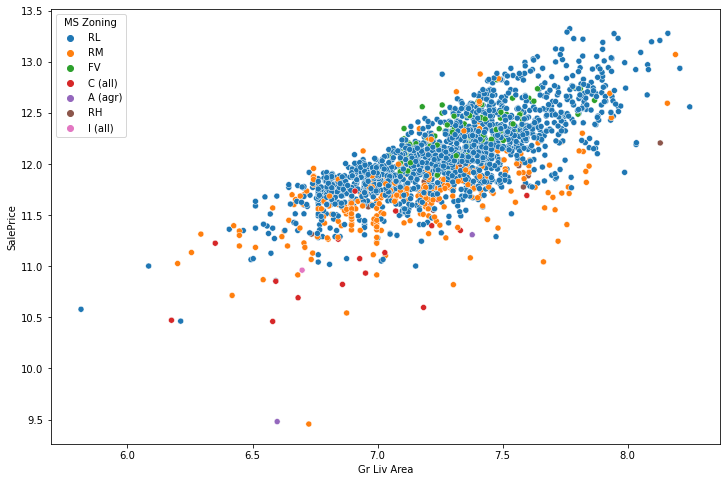

In [31]:
plot_scatter("MS Zoning")

In [32]:
df["MS Zoning"].value_counts(normalize=True)

RL         0.778917
RM         0.154222
FV         0.049292
C (all)    0.009273
RH         0.006833
A (agr)    0.000976
I (all)    0.000488
Name: MS Zoning, dtype: float64

In [33]:
del df["MS Zoning"]
columns_dropped.append("MS Zoning")

### Street

Almost all property street is paved. It is not a good predictor.


We will remove this feature.

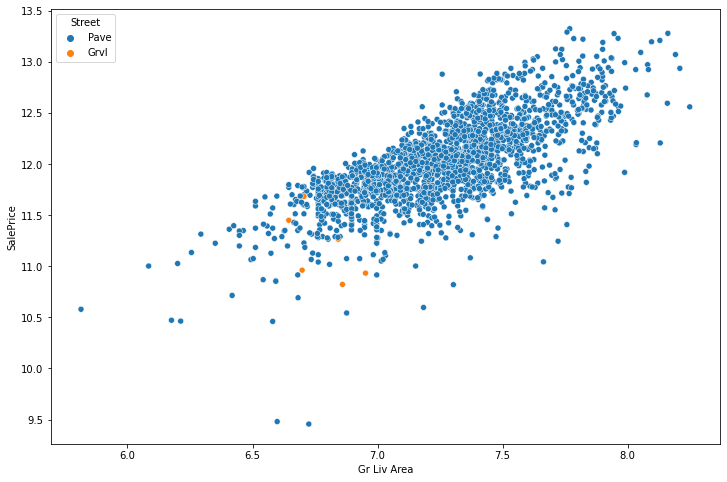

In [34]:
plot_scatter("Street")

In [35]:
del df["Street"]
columns_dropped.append("Street")

### Alleys


Earlier in this notebook we concluded that the `has_alley` feature is not a good predictor. This applies to the `Alley` feature as well.


We will remove this feature.

In [36]:
del df["Alley"]
columns_dropped.append("Alley")

### Land Contour


There is no apparent relationship between the different land contours and the value or size of the property. It is not a good predictor. The feature `Land Slope` also captures similar information.


We will remove this feature

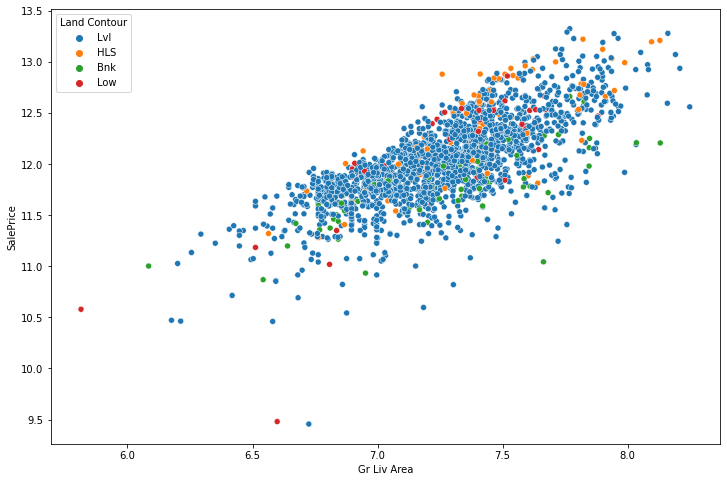

In [37]:
plot_scatter("Land Contour")

In [38]:
del df["Land Contour"]
columns_dropped.append("Land Contour")

### Utilities


Almost all properties have full utilities, it is not a good predictor.


We will remove this feature.

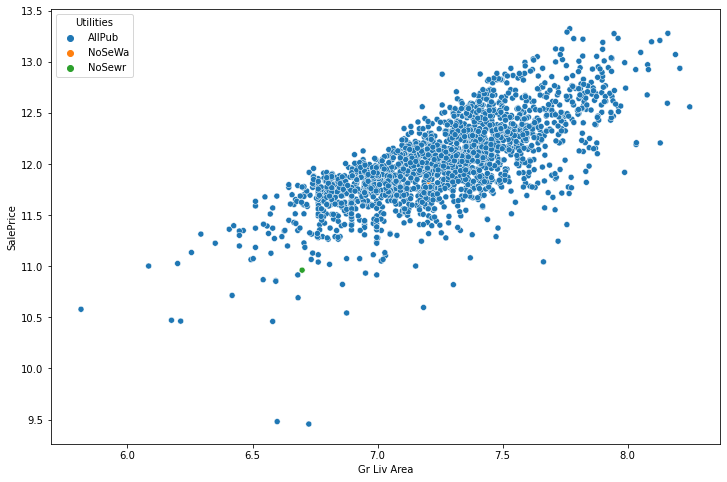

In [39]:
plot_scatter("Utilities")

In [40]:
del df["Utilities"]
columns_dropped.append("Utilities")

### Lot Config


There is no apparent relationship between the features with the area and value of the property. It is not a good predictor.


We will remove this feature.

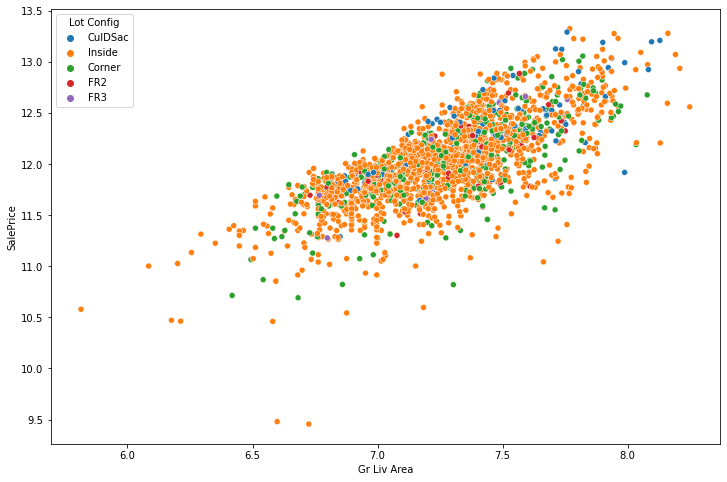

In [41]:
plot_scatter("Lot Config")

In [42]:
del df["Lot Config"]

columns_dropped.append("Lot Config")

### Condition 1 and Condition 2


Almost all of the properties are "Norm". This is not a good predictor.


We will remove this feature.

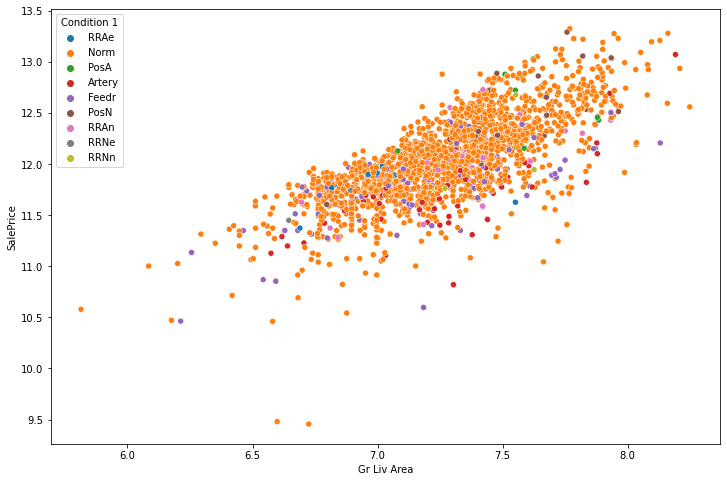

In [43]:
plot_scatter("Condition 1")

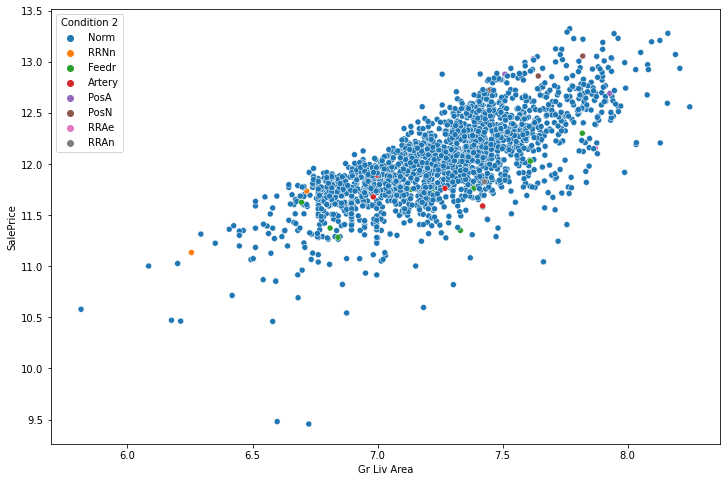

In [44]:
plot_scatter("Condition 2")

In [45]:
del df["Condition 1"]
del df["Condition 2"]

columns_dropped.append("Condition 1")
columns_dropped.append("Condition 2")

### Bldg Type


Almost all of the properties are 1 Family Home. This is not a good predictor. In addition, the type of a building is simply a label and the actual specifications of the property should be a better predictor.


We will remove this feature.

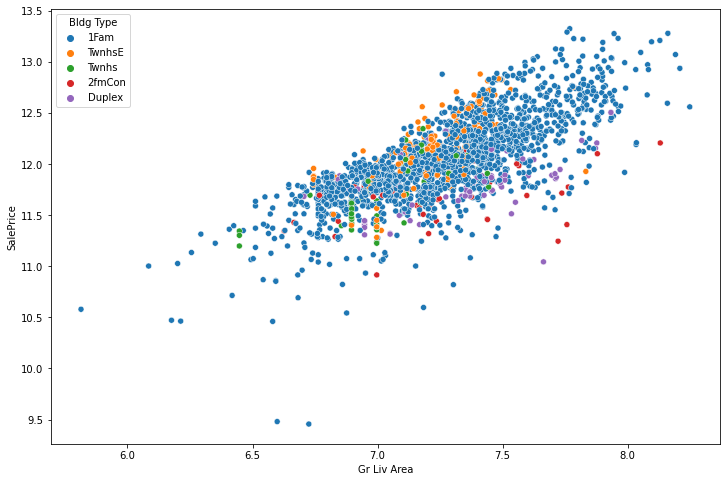

In [46]:
plot_scatter("Bldg Type")

In [47]:
del df["Bldg Type"]

columns_dropped.append("Bldg Type")

### House Style


This feature is quite similar to the `has_2f` feature. Conveys the same information that generally 2 story houses have a larger area but the value of 1 story houses is higher given the same area.


We will remove this feature.

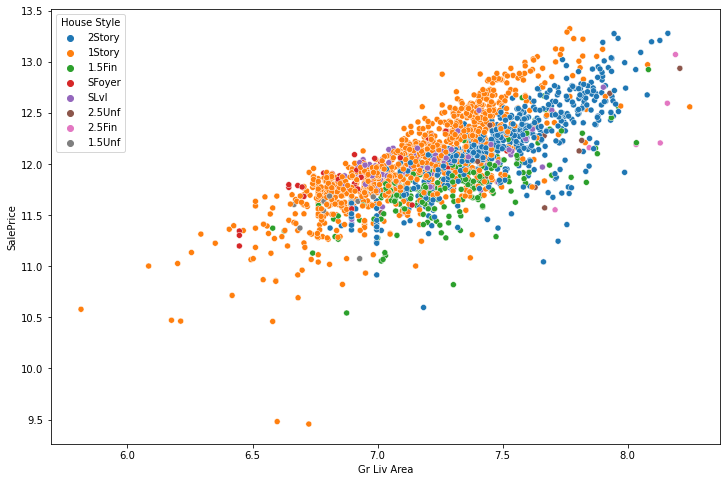

In [48]:
plot_scatter("House Style")

In [49]:
del df["House Style"]

columns_dropped.append("House Style")

### Roof Style and Roof Matl


There is no apparent relationship between the features with the area and value of the property. It is not a good predictor.


We will remove this feature.

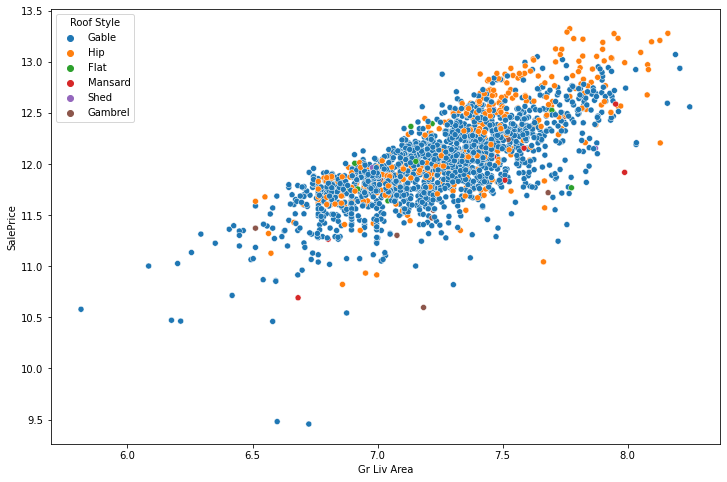

In [50]:
plot_scatter("Roof Style")

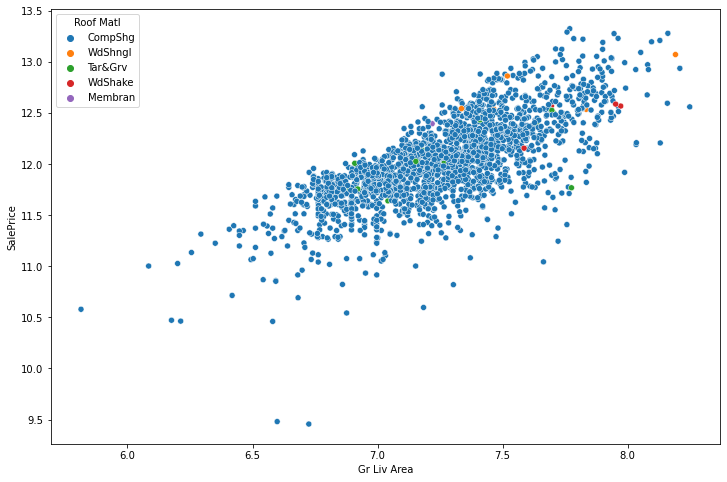

In [51]:
plot_scatter("Roof Matl")

In [52]:
del df["Roof Style"]
del df["Roof Matl"]

columns_dropped.append("Roof Matl")
columns_dropped.append("Roof Style")

### Exterior 1st and Exterior 2nd


There is no apparent relationship between the features with the area and value of the property. It is not a good predictor.


We will remove this feature.

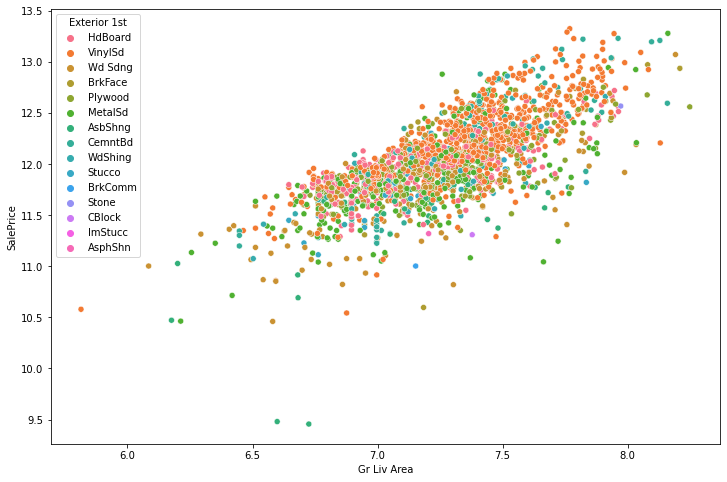

In [53]:
plot_scatter("Exterior 1st")

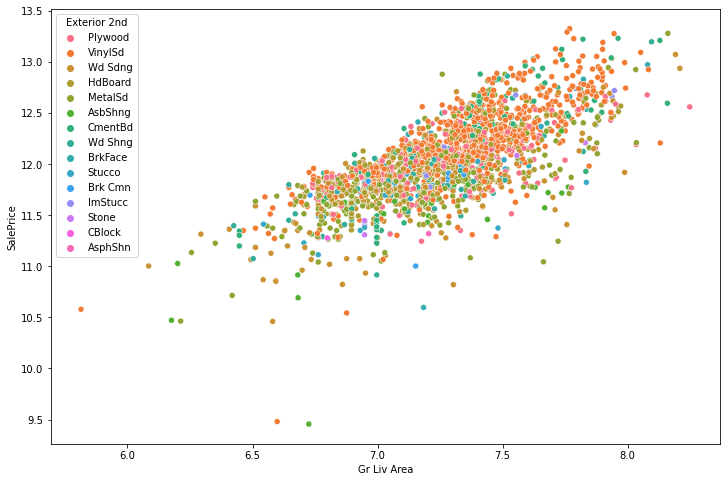

In [54]:
plot_scatter("Exterior 2nd")

In [55]:
del df["Exterior 1st"]
del df["Exterior 2nd"]

columns_dropped.append("Exterior 1st")
columns_dropped.append("Exterior 2nd")

### Mas Vnr Type


There is no apparent relationship between the features with the area and value of the property. It is not a good predictor.


We will remove this feature.

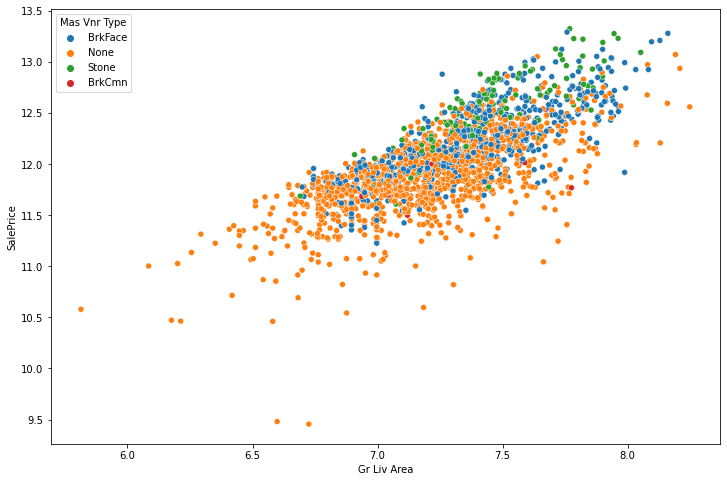

In [56]:
plot_scatter("Mas Vnr Type")

In [57]:
del df["Mas Vnr Type"]

columns_dropped.append("Mas Vnr Type")

### Foundation

Foundations made from `PConc` is observed to fetch a higher price given a fixed living area. Foundations made from `CBlock` also fetch a higher price than the rest of the materials (with the exception on `PConC`). 


We will retain this feature.

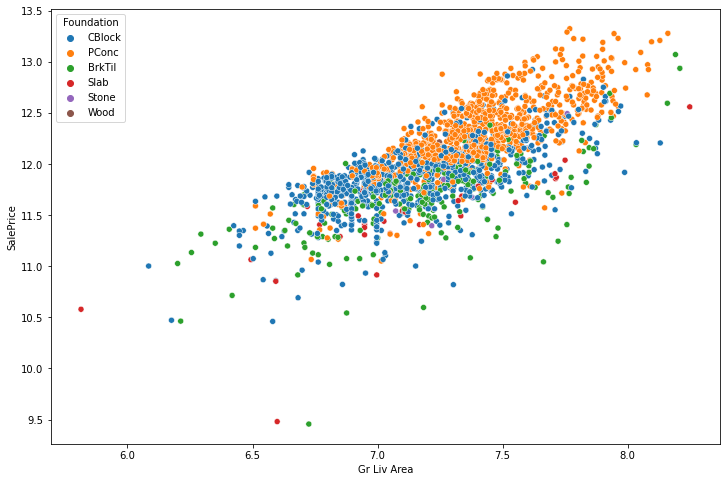

In [58]:
plot_scatter("Foundation")

In [59]:
foundation = pd.get_dummies(df["Foundation"], prefix="foundation")

del foundation["foundation_Slab"]
del foundation["foundation_Stone"]
del foundation["foundation_Wood"]

df = pd.concat([df, foundation], axis=1)

del df["Foundation"]
columns_dropped.append("Foundation")

for col in foundation.columns:
    new_features.append(col)

### Heating


Almost all properties has Gas Forced Warm Air Furnance. It is not a good predictor.


We will remove this feature.

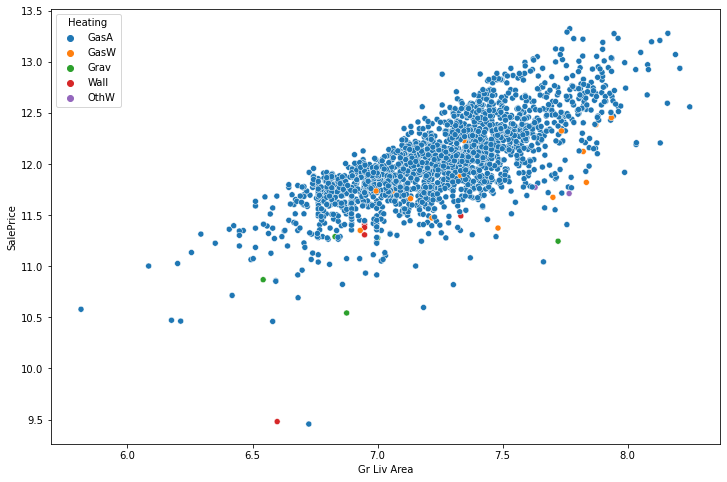

In [60]:
plot_scatter("Heating")

In [61]:
del df["Heating"]

columns_dropped.append("Heating")

### Electrical


Almost all properties has a Standard Circuit Breaker. It is not a good predictor.


We will remove this feature.

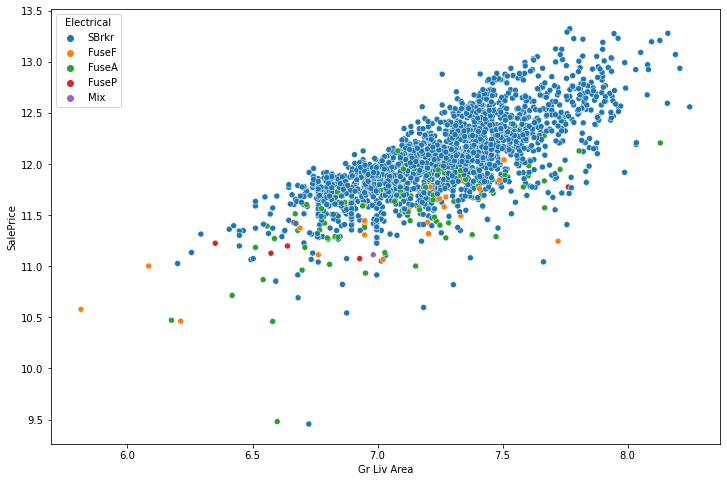

In [62]:
plot_scatter("Electrical")

In [63]:
del df["Electrical"]

columns_dropped.append("Electrical")

### Garage Type

This feature is quite similar to the `has_garage` feature. Conveys the same information that generally properties with a garage are generally higher in value. `has_garage` is more indicative.


We will remove this feature.

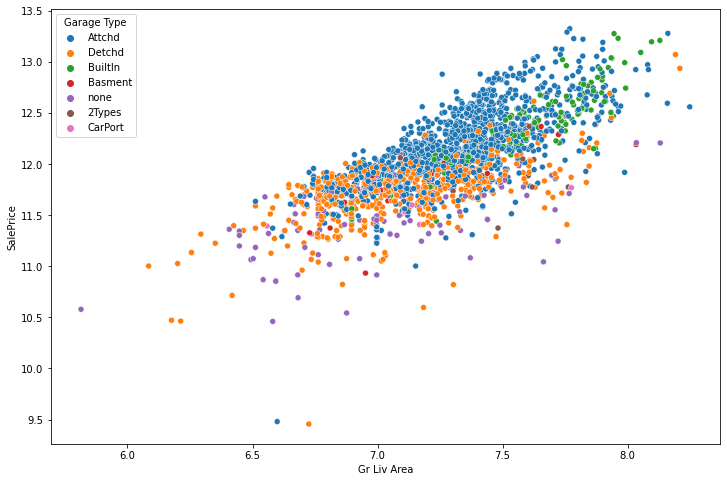

In [64]:
plot_scatter("Garage Type")

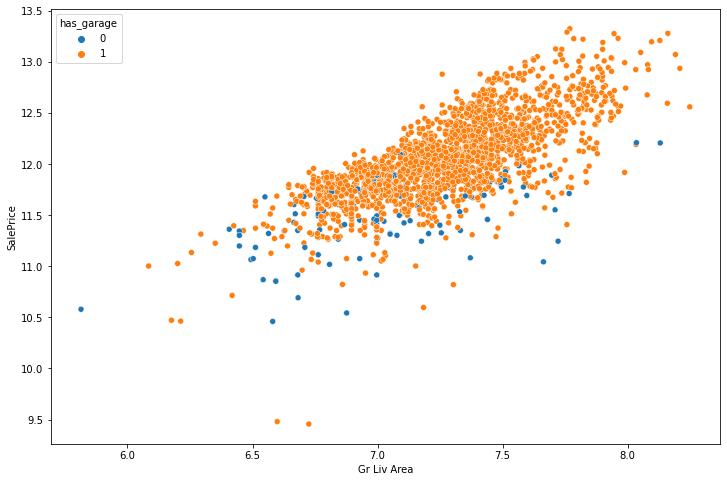

In [65]:
plot_scatter("has_garage")

In [66]:
del df["Garage Type"]

columns_dropped.append("Garage Type")

### Misc Feature


Almost all properties do not have Misc Features. This is not a good predictor.


We will remove this feature,

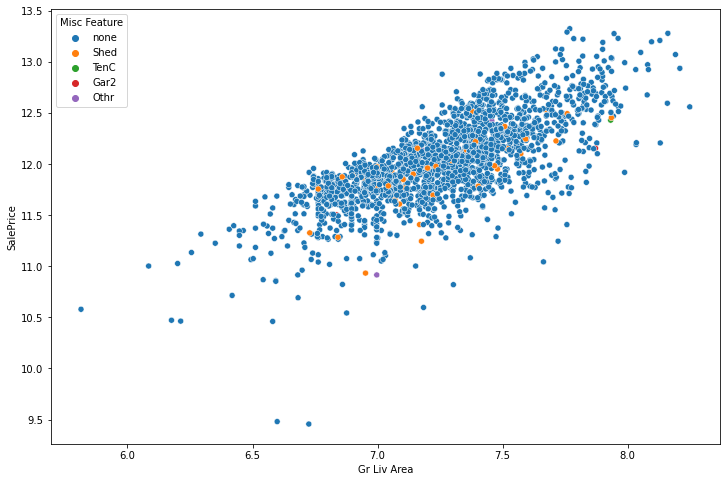

In [67]:
plot_scatter("Misc Feature")

In [68]:
del df["Misc Feature"]

columns_dropped.append("Misc Feature")

### Sale Type


At every fixed area, New properties seem to fetch a higher price compared with the rest of the sales.


We will dummify the feature and only retain `sale_new`.

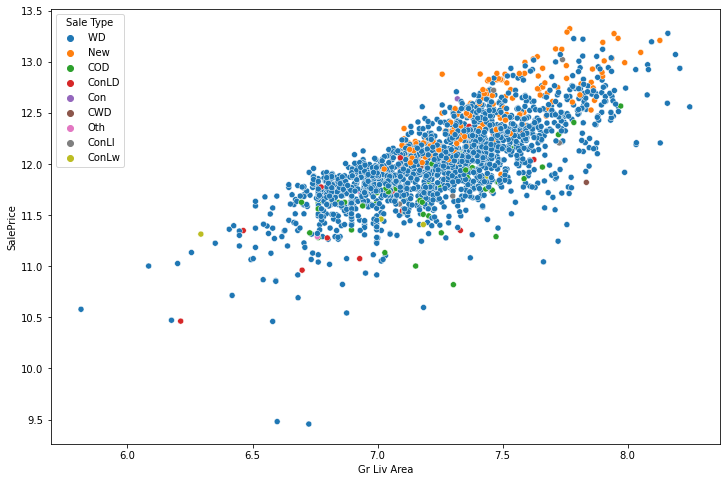

In [69]:
plot_scatter("Sale Type")

In [70]:
sale_type = pd.get_dummies(df["Sale Type"], prefix="sale")

del sale_type["sale_COD"]
del sale_type["sale_WD "]
del sale_type["sale_ConLD"]
del sale_type["sale_Con"]
del sale_type["sale_CWD"]
del sale_type["sale_Oth"]
del sale_type["sale_ConLI"]
del sale_type["sale_ConLw"]

df = pd.concat([df, sale_type], axis=1)
del df["Sale Type"]
columns_dropped.append("Sale Type")
new_features.append("sale_New")

### Neighborhood


We will dummify the `neighborhood` column and add it wholesale to the DataFrame as different neighborhoods may have features that are not captured in this dataset which affect property value (eg. crime rate, proximity to good schools etc)

In [71]:
neighborhood = pd.get_dummies(df["Neighborhood"], prefix="neighborhood")
df = pd.concat([df, neighborhood], axis=1)

del df["Neighborhood"]
columns_dropped.append("Neighborhood")

for col in neighborhood.columns:
    new_features.append(col)

In [72]:
df.to_csv("df_EDA_transformed.csv", index_label=False)

In [73]:
print(f"we have dropped {len(columns_dropped)} columns and added {len(new_features)} columns to the dataset.")

we have dropped 28 columns and added 37 columns to the dataset.


## Notebook Summary


In this notebook, we have selected the useful nominal features, created new features to include inside our final dataset and removed 2 rows which proved to be outliers. The resulting dataframe was saved and will be used for modelling in Part 3.


We have added 37 new columns (28 were dummified features from the `Neighborhood` feature, and dropped 28 nominal features from the dataset. There is a net increase of of 9 columns, bringing the number of columns in our dataset to **90** columns.